<a href="https://colab.research.google.com/github/Alvaroguijarro97/ML_Group_Project/blob/main/Dataframes_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combination of different Data Sets

In [1]:
# importing basic modules
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
# import file "foreign_data_by_state_sorted.csv"
from google.colab import files
uploaded = files.upload()

Saving foreign_data_by_state_sorted.csv to foreign_data_by_state_sorted.csv


In [3]:
import io
foreign_data_complete = pd.read_csv(io.BytesIO(uploaded['foreign_data_by_state_sorted.csv']), encoding="windows_1258")

foreign_data_complete = foreign_data_complete.drop([0])

foreign_data_complete = foreign_data_complete.rename(
    columns={
        "Foreign_Population": "Foreign_Population.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

In [4]:
# import file "migrant_background_data_by_state_sorted"
from google.colab import files
uploaded = files.upload()

Saving migrant_background_data_by_state_sorted.csv to migrant_background_data_by_state_sorted.csv


In [5]:
import io
migrant_background_data_complete = pd.read_csv(io.BytesIO(uploaded['migrant_background_data_by_state_sorted.csv']), encoding="windows_1258")

migrant_background_data_complete = migrant_background_data_complete.drop([0])

migrant_background_data_complete = migrant_background_data_complete.rename(
    columns={
        "Population with migrant background": "Population with migrant background.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

In [6]:
# import file "geographical_data_by_state_sorted"
from google.colab import files
uploaded = files.upload()

Saving geographical_data_by_state_sorted.csv to geographical_data_by_state_sorted.csv


In [7]:
import io
geography_data_complete = pd.read_csv(io.BytesIO(uploaded['geographical_data_by_state_sorted.csv']), encoding="windows_1258")
geography_data_complete = geography_data_complete.drop([0])

geography_data_complete = geography_data_complete.rename(
    columns={
        "Distance": "Distance.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

In [8]:
blank_df = pd.DataFrame(
    {
    "Baden-Württemberg": [],
    "Bavaria": [],
    "Berlin": [],
    "Brandenburg": [],
    "Bremen": [],
    "Hamburg": [],
    "Hesse": [],
    "Mecklenburg Western Pomerania": [],
    "Lower Saxony": [],
    "Northrhine-Westphalia": [],
    "Rhineland Palatinate": [],
    "Saarland": [],
    "Sachsen": [],
    "Sachsen-Anhalt": [],
    "Schleswig-Holstein": [],
    "Thuringia": []
    }
)

blank_df = blank_df.T

In [9]:
central_table_renamed_filtered_1 = blank_df.join(migrant_background_data_complete, rsuffix='_migrant')
central_table_renamed_filtered_1 = central_table_renamed_filtered_1.add_suffix('_migrant')

central_table_renamed_filtered_2 = blank_df.join(foreign_data_complete, rsuffix='_foreign')
central_table_renamed_filtered_2 = central_table_renamed_filtered_2.add_suffix('_foreign')

central_table_renamed_filtered_3 = blank_df.join(geography_data_complete, rsuffix='_geography')
central_table_renamed_filtered_3 = central_table_renamed_filtered_3.add_suffix('_geography')

central_table_migrant_background_foreign = central_table_renamed_filtered_1.join(central_table_renamed_filtered_2)

central_table_migrant_background_foreign_geography = central_table_migrant_background_foreign.join(central_table_renamed_filtered_3)

In [10]:
#Upload Data_Abortion_state.csv
from google.colab import files
uploaded = files.upload()

Saving Data_Abortion_state.csv to Data_Abortion_state.csv


In [11]:
import io
df_abortion_state = pd.read_csv(io.BytesIO(uploaded['Data_Abortion_state.csv']) ,encoding="windows_1258")
df_abortion_state = df_abortion_state.rename(index = {
    0: 'Baden-Württemberg',
    1: 'Bavaria',
    2: 'Berlin',
    3: 'Brandenburg',
    4: 'Bremen',
    5: 'Hamburg',
    6: 'Hesse',
    7: 'Mecklenburg Western Pomerania',
    8: 'Lower Saxony',
    9: 'Northrhine-Westphalia',
    10: 'Rhineland Palatinate',
    11: 'Saarland',
    12: 'Sachsen',
    13: 'Sachsen-Anhalt',
    14: 'Schleswig-Holstein',
    15: 'Thuringia'},
  columns = {
       "Ausland" : "Foreign"
       }
    )

In [12]:
column_names = list(df_abortion_state.columns)
df_abortion_total = df_abortion_state.convert_dtypes()
df_abortion_total['Germans_total']= df_abortion_state[column_names[:-1]].sum(axis=1)
df_abortion_total = df_abortion_total.rename(index={
    0: 'Baden-Württemberg',
    1: 'Bavaria',
    2: 'Berlin',
    3: 'Brandenburg',
    4: 'Bremen',
    5: 'Hamburg',
    6: 'Hesse',
    7: 'Mecklenburg Western Pomerania',
    8: 'Lower Saxony',
    9: 'Northrhine-Westphalia',
    10: 'Rhineland Palatinate',
    11: 'Saarland',
    12: 'Sachsen',
    13: 'Sachsen-Anhalt',
    14: 'Schleswig-Holstein',
    15: 'Thuringia'}
    )
df_abortion_total = df_abortion_total.filter(items = ["Foreign", "Germans_total"])
df_abortion_total = df_abortion_total.fillna(0)

In [13]:
#Add the abortion information of each state into the dataframe
central_table_migrant_background_foreign_geography["abortions_total"] = df_abortion_total["Germans_total"]
central_table_migrant_background_foreign_geography["abortions_foreign"] = df_abortion_total["Foreign"]
central_table_migrant_background_foreign_geography["abortions_local"] = df_abortion_total["Germans_total"] - df_abortion_total["Foreign"]
central_table_migrant_background_foreign_geography["abortions_type"] = ""

#Create DataFrame containing the rows for the foreign abortions in Germany
central_table_migrant_background_foreign_geography_aforeign = central_table_migrant_background_foreign_geography.loc[central_table_migrant_background_foreign_geography.index.repeat(central_table_migrant_background_foreign_geography.abortions_foreign)]
central_table_migrant_background_foreign_geography_aforeign.abortions_type = 1

#Create DataFrame containing the rows for the foreign abortions in Germany
central_table_migrant_background_foreign_geography_alocal = central_table_migrant_background_foreign_geography.loc[central_table_migrant_background_foreign_geography.index.repeat(central_table_migrant_background_foreign_geography.abortions_local)]
central_table_migrant_background_foreign_geography_alocal.abortions_type = 0

info = [central_table_migrant_background_foreign_geography_aforeign,central_table_migrant_background_foreign_geography_alocal]
central_table_migrant_background_foreign_geography_repeated = pd.concat(info)

In [ ]:
# possibility to download the generated Data Frame
central_table_migrant_background_foreign_geography_repeated.to_csv('central_table_migrant_background_foreign_geography_repeated.csv') 
from google.colab import files
files.download("central_table_migrant_background_foreign_geography_repeated.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# Central Table with the NAs replaced by 0 since in our case NA means to small to measure (wihle other populations are represented by small single digit numbers)
No_NA_central_table = central_table_migrant_background_foreign_geography_repeated.fillna(0)

In [ ]:
# possibility to download the generated Data Frame without NAs
No_NA_central_table.to_csv('No_NA_central_table.csv') 
from google.colab import files
files.download("No_NA_central_table.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
No_NA_central_table.columns

Index(['Population with migrant background.0_migrant',
       'Population with migrant background.1_migrant',
       'Population with migrant background.2_migrant',
       'Population with migrant background.3_migrant',
       'Population with migrant background.4_migrant',
       'Population with migrant background.5_migrant',
       'Population with migrant background.6_migrant',
       'Population with migrant background.7_migrant',
       'Population with migrant background.8_migrant',
       'Population with migrant background.9_migrant',
       ...
       'Country_Score.25_geography', 'Country_Score.26_geography',
       'Country_Score.27_geography', 'Country_Score.28_geography',
       'Country_Score.29_geography', 'Country_Score.30_geography',
       'abortions_total', 'abortions_foreign', 'abortions_local',
       'abortions_type'],
      dtype='object', length=229)

# Basic Model Creation

In [16]:
# Delete string variable country code
No_NA_central_table_no_ISO3 = No_NA_central_table[No_NA_central_table.columns.drop(list(No_NA_central_table.filter(regex = "Country\.")))]


## Interaction terms

In [17]:
# create interaction terms for geography
interaction_geo_0 = No_NA_central_table_no_ISO3['Distance.0_geography'] * No_NA_central_table_no_ISO3['Country_Score.0_geography']
No_NA_central_table_no_ISO3['0_geography*'] = interaction_geo_0

interaction_geo_1 = No_NA_central_table_no_ISO3['Distance.1_geography'] * No_NA_central_table_no_ISO3['Country_Score.1_geography']
No_NA_central_table_no_ISO3['1_geography*'] = interaction_geo_1

interaction_geo_2 = No_NA_central_table_no_ISO3['Distance.2_geography'] * No_NA_central_table_no_ISO3['Country_Score.2_geography']
No_NA_central_table_no_ISO3['2_geography*'] = interaction_geo_2

interaction_geo_3 = No_NA_central_table_no_ISO3['Distance.3_geography'] * No_NA_central_table_no_ISO3['Country_Score.3_geography']
No_NA_central_table_no_ISO3['3_geography*'] = interaction_geo_3

interaction_geo_4 = No_NA_central_table_no_ISO3['Distance.4_geography'] * No_NA_central_table_no_ISO3['Country_Score.4_geography']
No_NA_central_table_no_ISO3['4_geography*'] = interaction_geo_4

interaction_geo_5 = No_NA_central_table_no_ISO3['Distance.5_geography'] * No_NA_central_table_no_ISO3['Country_Score.5_geography']
No_NA_central_table_no_ISO3['5_geography*'] = interaction_geo_5

interaction_geo_6 = No_NA_central_table_no_ISO3['Distance.6_geography'] * No_NA_central_table_no_ISO3['Country_Score.6_geography']
No_NA_central_table_no_ISO3['6_geography*'] = interaction_geo_6

interaction_geo_7 = No_NA_central_table_no_ISO3['Distance.7_geography'] * No_NA_central_table_no_ISO3['Country_Score.7_geography']
No_NA_central_table_no_ISO3['7_geography*'] = interaction_geo_7

interaction_geo_8 = No_NA_central_table_no_ISO3['Distance.8_geography'] * No_NA_central_table_no_ISO3['Country_Score.8_geography']
No_NA_central_table_no_ISO3['8_geography*'] = interaction_geo_8

interaction_geo_9 = No_NA_central_table_no_ISO3['Distance.9_geography'] * No_NA_central_table_no_ISO3['Country_Score.9_geography']
No_NA_central_table_no_ISO3['9_geography*'] = interaction_geo_9

interaction_geo_10 = No_NA_central_table_no_ISO3['Distance.10_geography'] * No_NA_central_table_no_ISO3['Country_Score.10_geography']
No_NA_central_table_no_ISO3['10_geography*'] = interaction_geo_10

interaction_geo_11 = No_NA_central_table_no_ISO3['Distance.11_geography'] * No_NA_central_table_no_ISO3['Country_Score.11_geography']
No_NA_central_table_no_ISO3['11_geography*'] = interaction_geo_11

interaction_geo_12 = No_NA_central_table_no_ISO3['Distance.12_geography'] * No_NA_central_table_no_ISO3['Country_Score.12_geography']
No_NA_central_table_no_ISO3['12_geography*'] = interaction_geo_12

interaction_geo_13 = No_NA_central_table_no_ISO3['Distance.13_geography'] * No_NA_central_table_no_ISO3['Country_Score.13_geography']
No_NA_central_table_no_ISO3['13_geography*'] = interaction_geo_13

interaction_geo_14 = No_NA_central_table_no_ISO3['Distance.14_geography'] * No_NA_central_table_no_ISO3['Country_Score.14_geography']
No_NA_central_table_no_ISO3['14_geography*'] = interaction_geo_14

interaction_geo_15 = No_NA_central_table_no_ISO3['Distance.15_geography'] * No_NA_central_table_no_ISO3['Country_Score.15_geography']
No_NA_central_table_no_ISO3['15_geography*'] = interaction_geo_15

interaction_geo_16 = No_NA_central_table_no_ISO3['Distance.16_geography'] * No_NA_central_table_no_ISO3['Country_Score.16_geography']
No_NA_central_table_no_ISO3['16_geography*'] = interaction_geo_16

interaction_geo_17 = No_NA_central_table_no_ISO3['Distance.17_geography'] * No_NA_central_table_no_ISO3['Country_Score.17_geography']
No_NA_central_table_no_ISO3['17_geography*'] = interaction_geo_17

interaction_geo_18 = No_NA_central_table_no_ISO3['Distance.18_geography'] * No_NA_central_table_no_ISO3['Country_Score.18_geography']
No_NA_central_table_no_ISO3['18_geography*'] = interaction_geo_18

interaction_geo_19 = No_NA_central_table_no_ISO3['Distance.19_geography'] * No_NA_central_table_no_ISO3['Country_Score.19_geography']
No_NA_central_table_no_ISO3['19_geography*'] = interaction_geo_19

interaction_geo_20 = No_NA_central_table_no_ISO3['Distance.20_geography'] * No_NA_central_table_no_ISO3['Country_Score.20_geography']
No_NA_central_table_no_ISO3['20_geography*'] = interaction_geo_20

interaction_geo_21 = No_NA_central_table_no_ISO3['Distance.21_geography'] * No_NA_central_table_no_ISO3['Country_Score.21_geography']
No_NA_central_table_no_ISO3['21_geography*'] = interaction_geo_21

interaction_geo_22 = No_NA_central_table_no_ISO3['Distance.22_geography'] * No_NA_central_table_no_ISO3['Country_Score.22_geography']
No_NA_central_table_no_ISO3['22_geography*'] = interaction_geo_22

interaction_geo_23 = No_NA_central_table_no_ISO3['Distance.23_geography'] * No_NA_central_table_no_ISO3['Country_Score.23_geography']
No_NA_central_table_no_ISO3['23_geography*'] = interaction_geo_23

interaction_geo_24 = No_NA_central_table_no_ISO3['Distance.24_geography'] * No_NA_central_table_no_ISO3['Country_Score.24_geography']
No_NA_central_table_no_ISO3['24_geography*'] = interaction_geo_24

interaction_geo_25 = No_NA_central_table_no_ISO3['Distance.25_geography'] * No_NA_central_table_no_ISO3['Country_Score.25_geography']
No_NA_central_table_no_ISO3['25_geography*'] = interaction_geo_25

interaction_geo_26 = No_NA_central_table_no_ISO3['Distance.26_geography'] * No_NA_central_table_no_ISO3['Country_Score.26_geography']
No_NA_central_table_no_ISO3['26_geography*'] = interaction_geo_26

interaction_geo_27 = No_NA_central_table_no_ISO3['Distance.27_geography'] * No_NA_central_table_no_ISO3['Country_Score.27_geography']
No_NA_central_table_no_ISO3['27_geography*'] = interaction_geo_27

interaction_geo_28 = No_NA_central_table_no_ISO3['Distance.28_geography'] * No_NA_central_table_no_ISO3['Country_Score.28_geography']
No_NA_central_table_no_ISO3['28_geography*'] = interaction_geo_28

interaction_geo_29 = No_NA_central_table_no_ISO3['Distance.29_geography'] * No_NA_central_table_no_ISO3['Country_Score.29_geography']
No_NA_central_table_no_ISO3['29_geography*'] = interaction_geo_29

interaction_geo_30 = No_NA_central_table_no_ISO3['Distance.30_geography'] * No_NA_central_table_no_ISO3['Country_Score.30_geography']
No_NA_central_table_no_ISO3['30_geography*'] = interaction_geo_30

<ipython-input-17-3056ad3c50c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_NA_central_table_no_ISO3['0_geography*'] = interaction_geo_0
<ipython-input-17-3056ad3c50c4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_NA_central_table_no_ISO3['1_geography*'] = interaction_geo_1
<ipython-input-17-3056ad3c50c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [18]:
# create interaction terms for migrant
interaction_mig_0 = No_NA_central_table_no_ISO3['Population with migrant background.0_migrant'] * No_NA_central_table_no_ISO3['Country_Score.0_migrant']
No_NA_central_table_no_ISO3['0_migrant*'] = interaction_mig_0

interaction_mig_1 = No_NA_central_table_no_ISO3['Population with migrant background.1_migrant'] * No_NA_central_table_no_ISO3['Country_Score.1_migrant']
No_NA_central_table_no_ISO3['1_migrant*'] = interaction_mig_1

interaction_mig_2 = No_NA_central_table_no_ISO3['Population with migrant background.2_migrant'] * No_NA_central_table_no_ISO3['Country_Score.2_migrant']
No_NA_central_table_no_ISO3['2_migrant*'] = interaction_mig_2

interaction_mig_3 = No_NA_central_table_no_ISO3['Population with migrant background.3_migrant'] * No_NA_central_table_no_ISO3['Country_Score.3_migrant']
No_NA_central_table_no_ISO3['3_migrant*'] = interaction_mig_3

interaction_mig_4 = No_NA_central_table_no_ISO3['Population with migrant background.4_migrant'] * No_NA_central_table_no_ISO3['Country_Score.4_migrant']
No_NA_central_table_no_ISO3['4_migrant*'] = interaction_mig_4

interaction_mig_5 = No_NA_central_table_no_ISO3['Population with migrant background.5_migrant'] * No_NA_central_table_no_ISO3['Country_Score.5_migrant']
No_NA_central_table_no_ISO3['5_migrant*'] = interaction_mig_5

interaction_mig_6 = No_NA_central_table_no_ISO3['Population with migrant background.6_migrant'] * No_NA_central_table_no_ISO3['Country_Score.6_migrant']
No_NA_central_table_no_ISO3['6_migrant*'] = interaction_mig_6

interaction_mig_7 = No_NA_central_table_no_ISO3['Population with migrant background.7_migrant'] * No_NA_central_table_no_ISO3['Country_Score.7_migrant']
No_NA_central_table_no_ISO3['7_migrant*'] = interaction_mig_7

interaction_mig_8 = No_NA_central_table_no_ISO3['Population with migrant background.8_migrant'] * No_NA_central_table_no_ISO3['Country_Score.8_migrant']
No_NA_central_table_no_ISO3['8_migrant*'] = interaction_mig_8

interaction_mig_9 = No_NA_central_table_no_ISO3['Population with migrant background.9_migrant'] * No_NA_central_table_no_ISO3['Country_Score.9_migrant']
No_NA_central_table_no_ISO3['9_migrant*'] = interaction_mig_9

interaction_mig_10 = No_NA_central_table_no_ISO3['Population with migrant background.10_migrant'] * No_NA_central_table_no_ISO3['Country_Score.10_migrant']
No_NA_central_table_no_ISO3['10_migrant*'] = interaction_mig_10

interaction_mig_11 = No_NA_central_table_no_ISO3['Population with migrant background.11_migrant'] * No_NA_central_table_no_ISO3['Country_Score.11_migrant']
No_NA_central_table_no_ISO3['11_migrant*'] = interaction_mig_11

interaction_mig_12 = No_NA_central_table_no_ISO3['Population with migrant background.12_migrant'] * No_NA_central_table_no_ISO3['Country_Score.12_migrant']
No_NA_central_table_no_ISO3['12_migrant*'] = interaction_mig_12

<ipython-input-18-17e83b138b08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_NA_central_table_no_ISO3['0_migrant*'] = interaction_mig_0
<ipython-input-18-17e83b138b08>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_NA_central_table_no_ISO3['1_migrant*'] = interaction_mig_1
<ipython-input-18-17e83b138b08>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [19]:
# create interaction terms for foreign
interaction_foreign_0 = No_NA_central_table_no_ISO3['Foreign_Population.0_foreign'] * No_NA_central_table_no_ISO3['Country_Score.0_foreign']
No_NA_central_table_no_ISO3['0_foreign*'] = interaction_foreign_0

interaction_foreign_1 = No_NA_central_table_no_ISO3['Foreign_Population.1_foreign'] * No_NA_central_table_no_ISO3['Country_Score.1_foreign']
No_NA_central_table_no_ISO3['1_foreign*'] = interaction_foreign_1

interaction_foreign_2 = No_NA_central_table_no_ISO3['Foreign_Population.2_foreign'] * No_NA_central_table_no_ISO3['Country_Score.2_foreign']
No_NA_central_table_no_ISO3['2_foreign*'] = interaction_foreign_2

interaction_foreign_3 = No_NA_central_table_no_ISO3['Foreign_Population.3_foreign'] * No_NA_central_table_no_ISO3['Country_Score.3_foreign']
No_NA_central_table_no_ISO3['3_foreign*'] = interaction_foreign_3

interaction_foreign_4 = No_NA_central_table_no_ISO3['Foreign_Population.4_foreign'] * No_NA_central_table_no_ISO3['Country_Score.4_foreign']
No_NA_central_table_no_ISO3['4_foreign*'] = interaction_foreign_4

interaction_foreign_5 = No_NA_central_table_no_ISO3['Foreign_Population.5_foreign'] * No_NA_central_table_no_ISO3['Country_Score.5_foreign']
No_NA_central_table_no_ISO3['5_foreign*'] = interaction_foreign_5

interaction_foreign_6 = No_NA_central_table_no_ISO3['Foreign_Population.6_foreign'] * No_NA_central_table_no_ISO3['Country_Score.6_foreign']
No_NA_central_table_no_ISO3['6_foreign*'] = interaction_foreign_6

interaction_foreign_7 = No_NA_central_table_no_ISO3['Foreign_Population.7_foreign'] * No_NA_central_table_no_ISO3['Country_Score.7_foreign']
No_NA_central_table_no_ISO3['7_foreign*'] = interaction_foreign_7

interaction_foreign_8 = No_NA_central_table_no_ISO3['Foreign_Population.8_foreign'] * No_NA_central_table_no_ISO3['Country_Score.8_foreign']
No_NA_central_table_no_ISO3['8_foreign*'] = interaction_foreign_8

interaction_foreign_9 = No_NA_central_table_no_ISO3['Foreign_Population.9_foreign'] * No_NA_central_table_no_ISO3['Country_Score.9_foreign']
No_NA_central_table_no_ISO3['9_foreign*'] = interaction_foreign_9

interaction_foreign_10 = No_NA_central_table_no_ISO3['Foreign_Population.10_foreign'] * No_NA_central_table_no_ISO3['Country_Score.10_foreign']
No_NA_central_table_no_ISO3['10_foreign*'] = interaction_foreign_10

interaction_foreign_11 = No_NA_central_table_no_ISO3['Foreign_Population.11_foreign'] * No_NA_central_table_no_ISO3['Country_Score.11_foreign']
No_NA_central_table_no_ISO3['11_foreign*'] = interaction_foreign_11

interaction_foreign_12 = No_NA_central_table_no_ISO3['Foreign_Population.12_foreign'] * No_NA_central_table_no_ISO3['Country_Score.12_foreign']
No_NA_central_table_no_ISO3['12_foreign*'] = interaction_foreign_12

interaction_foreign_13 = No_NA_central_table_no_ISO3['Foreign_Population.13_foreign'] * No_NA_central_table_no_ISO3['Country_Score.13_foreign']
No_NA_central_table_no_ISO3['13_foreign*'] = interaction_foreign_13

interaction_foreign_14 = No_NA_central_table_no_ISO3['Foreign_Population.14_foreign'] * No_NA_central_table_no_ISO3['Country_Score.14_foreign']
No_NA_central_table_no_ISO3['14_foreign*'] = interaction_foreign_14

interaction_foreign_15 = No_NA_central_table_no_ISO3['Foreign_Population.15_foreign'] * No_NA_central_table_no_ISO3['Country_Score.15_foreign']
No_NA_central_table_no_ISO3['15_foreign*'] = interaction_foreign_15

interaction_foreign_16 = No_NA_central_table_no_ISO3['Foreign_Population.16_foreign'] * No_NA_central_table_no_ISO3['Country_Score.16_foreign']
No_NA_central_table_no_ISO3['16_foreign*'] = interaction_foreign_16

interaction_foreign_17 = No_NA_central_table_no_ISO3['Foreign_Population.17_foreign'] * No_NA_central_table_no_ISO3['Country_Score.17_foreign']
No_NA_central_table_no_ISO3['17_foreign*'] = interaction_foreign_17

interaction_foreign_18 = No_NA_central_table_no_ISO3['Foreign_Population.18_foreign'] * No_NA_central_table_no_ISO3['Country_Score.18_foreign']
No_NA_central_table_no_ISO3['18_foreign*'] = interaction_foreign_18

interaction_foreign_19 = No_NA_central_table_no_ISO3['Foreign_Population.19_foreign'] * No_NA_central_table_no_ISO3['Country_Score.19_foreign']
No_NA_central_table_no_ISO3['19_foreign*'] = interaction_foreign_19

interaction_foreign_20 = No_NA_central_table_no_ISO3['Foreign_Population.20_foreign'] * No_NA_central_table_no_ISO3['Country_Score.20_foreign']
No_NA_central_table_no_ISO3['20_foreign*'] = interaction_foreign_20

interaction_foreign_21 = No_NA_central_table_no_ISO3['Foreign_Population.21_foreign'] * No_NA_central_table_no_ISO3['Country_Score.21_foreign']
No_NA_central_table_no_ISO3['21_foreign*'] = interaction_foreign_21

interaction_foreign_22 = No_NA_central_table_no_ISO3['Foreign_Population.22_foreign'] * No_NA_central_table_no_ISO3['Country_Score.22_foreign']
No_NA_central_table_no_ISO3['22_foreign*'] = interaction_foreign_22

interaction_foreign_23 = No_NA_central_table_no_ISO3['Foreign_Population.23_foreign'] * No_NA_central_table_no_ISO3['Country_Score.23_foreign']
No_NA_central_table_no_ISO3['23_foreign*'] = interaction_foreign_23

interaction_foreign_24 = No_NA_central_table_no_ISO3['Foreign_Population.24_foreign'] * No_NA_central_table_no_ISO3['Country_Score.24_foreign']
No_NA_central_table_no_ISO3['24_foreign*'] = interaction_foreign_24

interaction_foreign_25 = No_NA_central_table_no_ISO3['Foreign_Population.25_foreign'] * No_NA_central_table_no_ISO3['Country_Score.25_foreign']
No_NA_central_table_no_ISO3['25_foreign*'] = interaction_foreign_25

interaction_foreign_26 = No_NA_central_table_no_ISO3['Foreign_Population.26_foreign'] * No_NA_central_table_no_ISO3['Country_Score.26_foreign']
No_NA_central_table_no_ISO3['26_foreign*'] = interaction_foreign_26

interaction_foreign_27 = No_NA_central_table_no_ISO3['Foreign_Population.27_foreign'] * No_NA_central_table_no_ISO3['Country_Score.27_foreign']
No_NA_central_table_no_ISO3['27_foreign*'] = interaction_foreign_27

interaction_foreign_28 = No_NA_central_table_no_ISO3['Foreign_Population.28_foreign'] * No_NA_central_table_no_ISO3['Country_Score.28_foreign']
No_NA_central_table_no_ISO3['28_foreign*'] = interaction_foreign_28

interaction_foreign_29 = No_NA_central_table_no_ISO3['Foreign_Population.29_foreign'] * No_NA_central_table_no_ISO3['Country_Score.29_foreign']
No_NA_central_table_no_ISO3['29_foreign*'] = interaction_foreign_29

interaction_foreign_30 = No_NA_central_table_no_ISO3['Foreign_Population.30_foreign'] * No_NA_central_table_no_ISO3['Country_Score.30_foreign']
No_NA_central_table_no_ISO3['30_foreign*'] = interaction_foreign_30

<ipython-input-19-80f0862a1d76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_NA_central_table_no_ISO3['0_foreign*'] = interaction_foreign_0
<ipython-input-19-80f0862a1d76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_NA_central_table_no_ISO3['1_foreign*'] = interaction_foreign_1
<ipython-input-19-80f0862a1d76>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [20]:
# Delete string variable country code
Only_interaction_X_table = No_NA_central_table_no_ISO3[No_NA_central_table_no_ISO3.columns.drop(list(No_NA_central_table_no_ISO3.filter(regex = "\\.")))]

In [21]:
X_interaction = Only_interaction_X_table.drop(["abortions_foreign",	"abortions_local",	"abortions_type", "abortions_total"], axis=1)

## Basic Model Creation

In [22]:

# Set X and y values with our own data
X = No_NA_central_table_no_ISO3.drop(["abortions_foreign",	"abortions_local",	"abortions_type", "abortions_total"], axis=1)
y = No_NA_central_table_no_ISO3["abortions_type"]

In [23]:
# possibility to download the generated Data Frame without NAs
No_NA_central_table_no_ISO3.to_csv('No_NA_central_table_no_ISO3.csv') 
from google.colab import files
files.download("No_NA_central_table_no_ISO3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

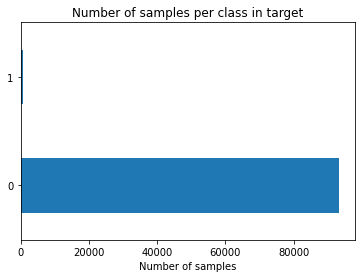

In [24]:
# Plot distribution of y
# y is etremely uneven distributed
import matplotlib.pyplot as plt

y.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per class in target")

In [25]:
# Set up training and testing data
from sklearn.model_selection import train_test_split
# TBA: set sub parameters (testsize etc.)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=123, test_size=0.5)

## StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Dummy Model

In [27]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
print(f"Accuracy Dummy Classifier: "
      f"{dummy_classifier.score(X_test, y_test):.3f}")

Accuracy Dummy Classifier: 0.994


## Logistic Regression Model (unweighted)

In [28]:
# Create Logistic Regression Model
from sklearn.linear_model import LogisticRegression
import time

# measuring the time to run the model
start_time = time.time()

classifier_no_weights = LogisticRegression(max_iter= 1000)
classifier_no_weights.fit(X_train, y_train)

# Time elapsed since starting computing
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the model: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the model: 3.235 seconds


### Accuracy Metrics

In [29]:
# LogisticRegression .score for the unweighted model for accuracy metrics
# Accuracy score is extremely high (which is a suspicious) 
unbalanced_accuracy_unweighted = classifier_no_weights.score(X_test, y_test)
print(f" Unbabalnced accuracy: {unbalanced_accuracy_unweighted:.3f}")

 Unbabalnced accuracy: 0.994


In [30]:
# Using 'balanced accuracy' metric (for binary and multiclass classification problems with imbalanced datasets)
# Definition: Average of recall obtained on each class
# Unweighted balanced accuracy is 50/50 (which is a poor score) 
 
from sklearn.metrics import balanced_accuracy_score

target_predicted = classifier_no_weights.predict(X_test)

balanced_accuracy_unweighted = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy_unweighted:.3f}")

Balanced accuracy: 0.500


In [31]:
from sklearn.metrics import roc_auc_score

# What about AUROC?
# Area Under ROC Curve (AUROC) represents the likelihood of your model distinguishing observations from two classes
prob_y_log = classifier_no_weights.predict_proba(X_test)
prob_y_log = [p[1] for p in prob_y_log]

print(f"Area Under ROC Curve (AUROC): "
      f"{roc_auc_score(y_test, prob_y_log):.4f}")


Area Under ROC Curve (AUROC): 0.9024


### Confusion Matrix

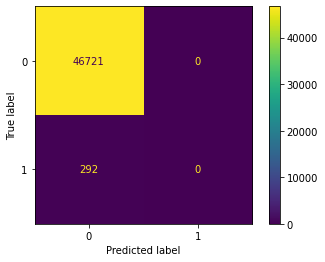

In [32]:
# Due to the extreme inbalance, an unweighted model predicts 0 foreign pregnancies
# An unweighted model therefore scores extremely high on unbalanced accuracy and extremely poor on balanced accuracy
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_no_weights, X_test, y_test)

## Logistic Regression Model (weighted)

In [33]:
# Optimized class weights based on the distribution of the y variables
from sklearn.utils.class_weight import compute_class_weight

# measuring the time to run the model
start_time = time.time()

classes = np.unique(y)
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
print(class_weights)

# Implement provided ideal weights into Logistic Regression Model
classifier_class_weights = LogisticRegression(max_iter= 1500, class_weight={0:class_weights[0],1:class_weights[1]})
classifier_class_weights.fit(X_train, y_train)
print(classifier_class_weights.fit(X_train, y_train))

# Time elapsed since starting computing
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the model: "
      f"{elapsed_time:.3f} seconds")

[ 0.50297422 84.5557554 ]
LogisticRegression(class_weight={0: 0.502974216326094, 1: 84.55575539568345},
                   max_iter=1500)
Elapsed time to compute the model: 2.922 seconds


In [34]:
# Implement provided ideal weights into Logistic Regression Model
classifier_class_weights = LogisticRegression(max_iter= 1500, class_weight={0:class_weights[0],1:class_weights[1]})
classifier_class_weights.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.502974216326094, 1: 84.55575539568345},
                   max_iter=1500)

In [35]:
# What about AUROC?
# Area Under ROC Curve (AUROC) represents the likelihood of your model distinguishing observations from two classes
prob_y_log_weigh = classifier_class_weights.predict_proba(X_test)
prob_y_log_weigh = [p[1] for p in prob_y_log_weigh]

print(f"Area Under ROC Curve (AUROC): "
      f"{roc_auc_score(y_test, prob_y_log_weigh):.4f}")

Area Under ROC Curve (AUROC): 0.9023


### Accuracy Metrics

In [36]:
# LogisticRegression .score for the unweighted model for accuracy metrics
# score is still high but not necessarily problematic (lower than unweighted)
unbalanced_accuracy_weighted = classifier_class_weights.score(X_test, y_test)
print(f" Unbabalanced accuracy: {unbalanced_accuracy_weighted:.3f}")

 Unbabalanced accuracy: 0.861


In [37]:
# Using 'balanced accuracy' metric (for binary and multiclass classification problems with imbalanced datasets)
# Definition: Average of recall obtained on each class
# Unweighted balanced accuracy is high and much better than the performance of the unweighted model 
 
from sklearn.metrics import balanced_accuracy_score

target_predicted = classifier_class_weights.predict(X_test)

balanced_accuracy_weighted = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy_weighted:.3f}")

Balanced accuracy: 0.845


### Confusion Matrix

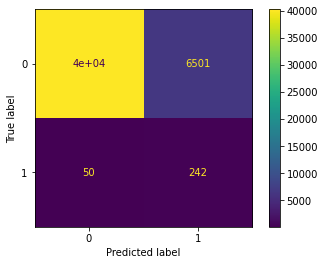

In [38]:
# Confusion Matrix shows much improved numbers
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_class_weights, X_test, y_test)

## Metrics

### Precision-Recall Curves



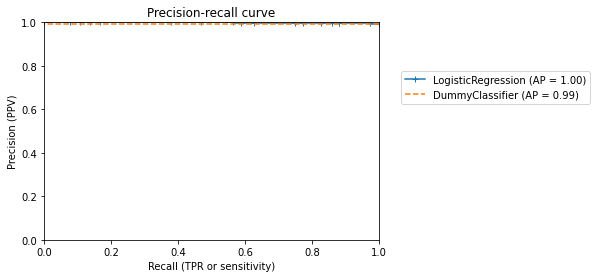

In [39]:
# Precision-Recall Curve
# reflects the high basic score of the dummy model (due to very inbalanced classes), however our weighted model still performs better
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    classifier_class_weights, X_test, y_test, pos_label= 0,
    marker="+")
disp = PrecisionRecallDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label= 0,
    color="tab:orange", linestyle="--", ax=disp.ax_)
plt.xlabel("Recall (TPR or sensitivity)")
plt.ylabel("Precision (PPV)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

###Receiver Operating Characteristic (ROC) Curve

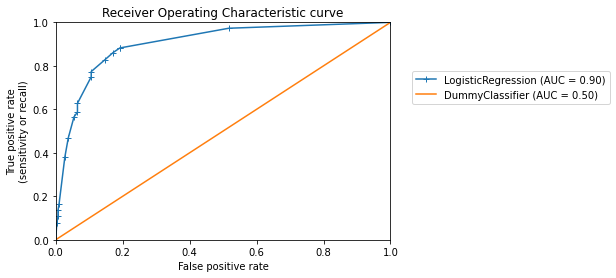

In [40]:
# Receiver Operating Characteristic (ROC) Curve
# probability threshold varies for determining prediction and compute the metrics
# Area under the ROC (ROC-AUC) to characterize the generalization performance of our classifier (similar to precision-recall curve above)
# lower bound of the ROC-AUC is 0.5 (generalization performance of dummy classifier)
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(
    classifier_class_weights, X_test, y_test, pos_label= 0,
    marker="+")
disp = RocCurveDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label= 0,
    color="tab:orange", ax=disp.ax_)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate\n(sensitivity or recall)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Receiver Operating Characteristic curve")



# Further Modeling 

## Random Forest

### Random Forest Classifier (unweighted)

In [41]:
# Decision trees often perform better on imbalanced datasets.
# their hierarchical structure allows them to learn signals from both classes.
# One Option here would be using a Random Forest model.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
import time

# measuring the time to run the model
start_time = time.time()
 
# Train model
classifier_forest = RandomForestClassifier(random_state=123)
classifier_forest.fit(X_train, y_train)
 
# Predict on training set
pred_y_forest = classifier_forest.predict(X_test)

# Time elapsed since starting computing
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the model: "
      f"{elapsed_time:.3f} seconds")

# Is our model predicting both classes?
print(f"Classes that are being predicted: "
      f"{np.unique(pred_y_forest)}")
# this model is only predicting 0, which means it’s completely ignoring the minority class in favor of the majority class
 
# How's our accuracy?
print(f"Accuracy Score: "
      f"{accuracy_score(y_test, pred_y_forest):.4f}")
 
# What about AUROC?
# Area Under ROC Curve (AUROC) represents the likelihood of your model distinguishing observations from two classes
prob_y_forest = classifier_forest.predict_proba(X_test)
prob_y_forest = [p[1] for p in prob_y_forest]

print(f"Area Under ROC Curve (AUROC): "
      f"{roc_auc_score(y_test, prob_y_forest):.4f}")

# time elapsed iclouding evalutaion
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the model and evaluation: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the model: 8.386 seconds
Classes that are being predicted: [0]
Accuracy Score: 0.9938
Area Under ROC Curve (AUROC): 0.9022
Elapsed time to compute the model and evaluation: 8.830 seconds


In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y_forest))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     46721
           1       0.00      0.00      0.00       292

    accuracy                           0.99     47013
   macro avg       0.50      0.50      0.50     47013
weighted avg       0.99      0.99      0.99     47013



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


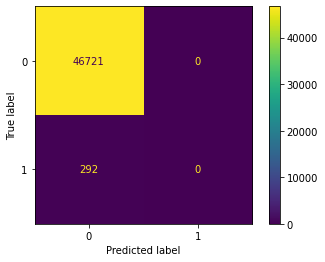

In [ ]:
# View confusion matrix for test data and predictions
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_forest, X_test, y_test)

### Random Forest Classifier (weighted)

In [ ]:
# Train model with balanced class weight

# measuring the time to run the model
start_time = time.time()

# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
classifier_weighted_forest = RandomForestClassifier(random_state=123, class_weight='balanced')
classifier_weighted_forest.fit(X_train, y_train)
 
# Predict on training set
pred_y_weighted_forest = classifier_weighted_forest.predict(X_test)

# Time elapsed since starting computing
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the model: "
      f"{elapsed_time:.3f} seconds")
 
# Is our model still predicting just one class?
print(f"Classes that are being predicted: "
      f"{np.unique(pred_y_weighted_forest)}")
 
# How's our accuracy when a weight is added?
print(f"Accuracy Score: "
      f"{accuracy_score(y_test, pred_y_weighted_forest):.4f}")
 
# What about AUROC?
# Area Under ROC Curve (AUROC) represents the likelihood of your model distinguishing observations from two classes
prob_y_weighted_forest = classifier_weighted_forest.predict_proba(X_test)
prob_y_weighted_forest = [p[1] for p in prob_y_weighted_forest]

print(f"Area Under ROC Curve (AUROC): "
      f"{roc_auc_score(y_test, pred_y_weighted_forest):.4f}")

# time elapsed iclouding evalutaion
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the model and evaluation: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the model: 7.311 seconds
Classes that are being predicted: [0 1]
Accuracy Score: 0.8607
Area Under ROC Curve (AUROC): 0.8448
Elapsed time to compute the model and evaluation: 7.787 seconds


In [ ]:
# View the classification report for test data and predictions

print(classification_report(y_test, pred_y_weighted_forest))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     46721
           1       0.04      0.83      0.07       292

    accuracy                           0.86     47013
   macro avg       0.52      0.84      0.50     47013
weighted avg       0.99      0.86      0.92     47013



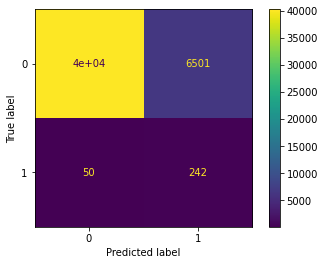

In [ ]:
# View confusion matrix for test data and predictions
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_weighted_forest, X_test, y_test)

### Random Forest with Random Undersampling

In [ ]:
# A balanced random forest randomly under-samples each boostrap sample to balance it.
from imblearn.ensemble import BalancedRandomForestClassifier

# measuring the time to run the model
start_time = time.time()

# Train model 
classifier_balanced_forest = BalancedRandomForestClassifier(random_state=123)
classifier_balanced_forest.fit(X_train, y_train)
 
# Predict on training set
pred_y_balanced_forest = classifier_balanced_forest.predict(X_test)

# Time elapsed since starting computing
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the model: "
      f"{elapsed_time:.3f} seconds")
 
# Is our model still predicting just one class?
print(f"Classes that are being predicted: "
      f"{np.unique(pred_y_balanced_forest)}")
 
# How's our accuracy when a weight is added?
print(f"Accuracy Score: "
      f"{accuracy_score(y_test, pred_y_balanced_forest):.4f}")
 
# What about AUROC?
# Area Under ROC Curve (AUROC) represents the likelihood of your model distinguishing observations from two classes
prob_y_balanced_forest = classifier_balanced_forest.predict_proba(X_test)
prob_y_balanced_forest = [p[1] for p in prob_y_balanced_forest]

print(f"Area Under ROC Curve (AUROC): "
      f"{roc_auc_score(y_test, prob_y_balanced_forest):.4f}")

# time elapsed iclouding evalutaion
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the model and evaluation: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the model: 2.231 seconds
Classes that are being predicted: [0 1]
Accuracy Score: 0.8607
Area Under ROC Curve (AUROC): 0.9035
Elapsed time to compute the model and evaluation: 2.704 seconds


In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y_balanced_forest))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     46721
           1       0.04      0.83      0.07       292

    accuracy                           0.86     47013
   macro avg       0.52      0.84      0.50     47013
weighted avg       0.99      0.86      0.92     47013



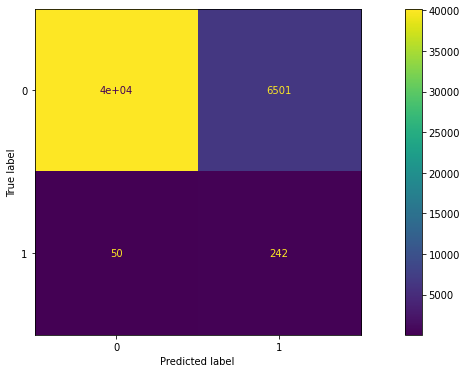

In [ ]:
# View confusion matrix for test data and predictions
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_balanced_forest, X_test, y_test)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

sel = SelectFromModel(classifier_balanced_forest)
sel.fit(X_train, y_train)

sel.get_support()

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

print(selected_feat)

Index(['Country_Score.6_foreign', 'Country_Score.7_foreign',
       'Country_Score.18_foreign', 'Distance.0_geography',
       'Distance.12_geography', 'Distance.14_geography',
       'Distance.15_geography', 'Distance.16_geography',
       'Distance.17_geography', 'Distance.18_geography',
       'Distance.19_geography', 'Distance.20_geography',
       'Distance.21_geography', 'Distance.24_geography',
       'Distance.26_geography', 'Distance.29_geography',
       'Distance.30_geography', 'Country_Score.1_geography',
       'Country_Score.2_geography', 'Country_Score.11_geography',
       'Country_Score.15_geography', 'Country_Score.16_geography',
       'Country_Score.20_geography', 'Country_Score.21_geography',
       'Country_Score.26_geography', 'Country_Score.27_geography'],
      dtype='object')


Feature: 0, Score: 106.00000
Feature: 1, Score: 121.00000
Feature: 2, Score: 139.00000
Feature: 3, Score: 117.00000
Feature: 4, Score: 108.00000
Feature: 5, Score: 63.00000
Feature: 6, Score: 120.00000
Feature: 7, Score: 112.00000
Feature: 8, Score: 146.00000
Feature: 9, Score: 109.00000


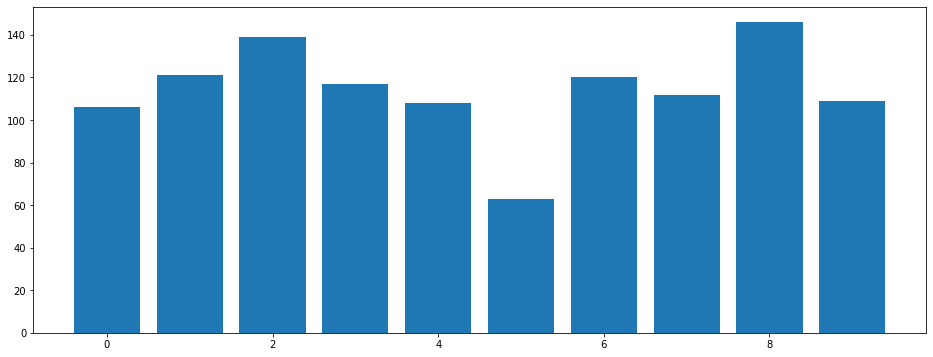

None


In [ ]:
# Random Forest Classification Feature Importance
from matplotlib import pyplot

# get importance
importance = classifier_balanced_forest.feature_importances_
sorted_importance = np.argsort(importance)
most_important = sorted_importance[-10 : ]

# summarize feature importance
for i,v in enumerate(most_important):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(most_important))], most_important)
print(pyplot.show())

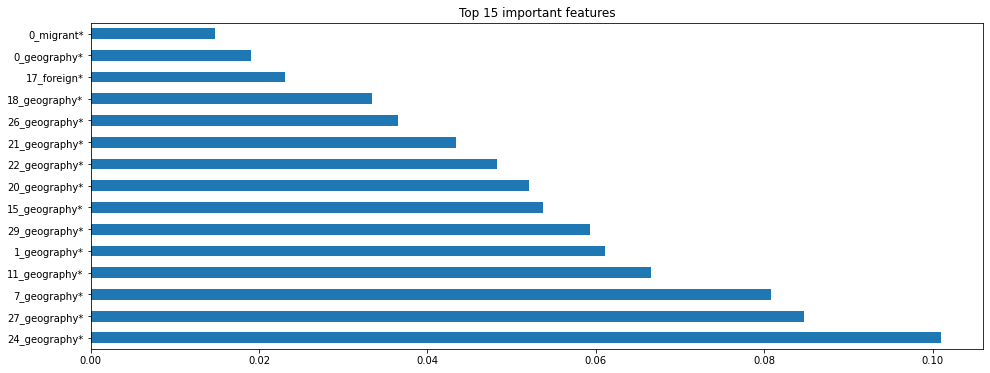

In [ ]:
feat_importances = pd.Series(classifier_balanced_forest.feature_importances_, index=X_interaction.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

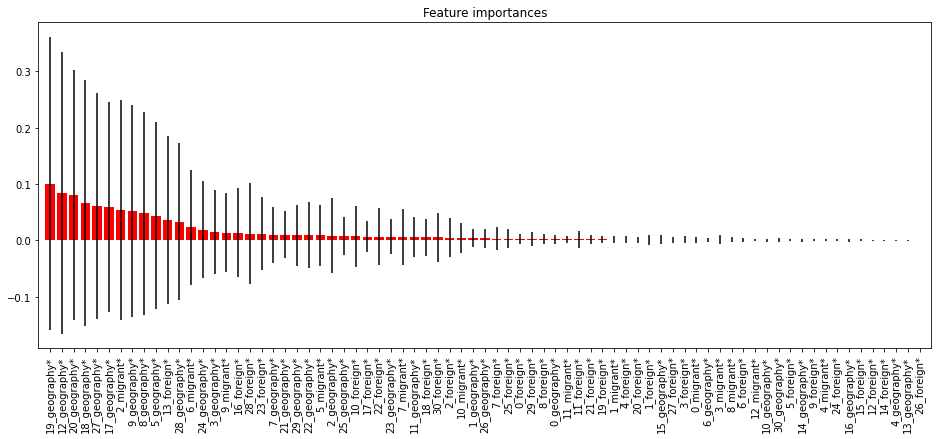

{
    "result_top_0": {
        "109": 0.000955445954375481,
        "120": 0.0007590275545907413,
        "112": 0.0007284471360907369,
        "108": 0.00047952202331355613,
        "63": 0.0004003425232439018,
        "106": 0.00023529630985439157,
        "105": 0.00011919855132614283,
        "145": 0.00010428119467955865,
        "134": 0.00010409391561717533,
        "107": 8.835230641855868e-05,
        "104": 6.200765834830338e-05,
        "119": 3.541719845653274e-05,
        "103": 3.509911078135814e-05,
        "110": 3.207094278446428e-05,
        "118": 2.4780447373026316e-05
    },
    "result_top_1": {
        "139": 0.07150153961331028,
        "117": 0.06158911439062946,
        "146": 0.051603100692276575,
        "75": 0.03282844078005778,
        "130": 0.030651146728775558,
        "135": 0.025491416587010447,
        "121": 0.02519393012801422,
        "88": 0.01894349581132059,
        "114": 0.012130287381461527,
        "64": 0.008254658929398126,
        "60"

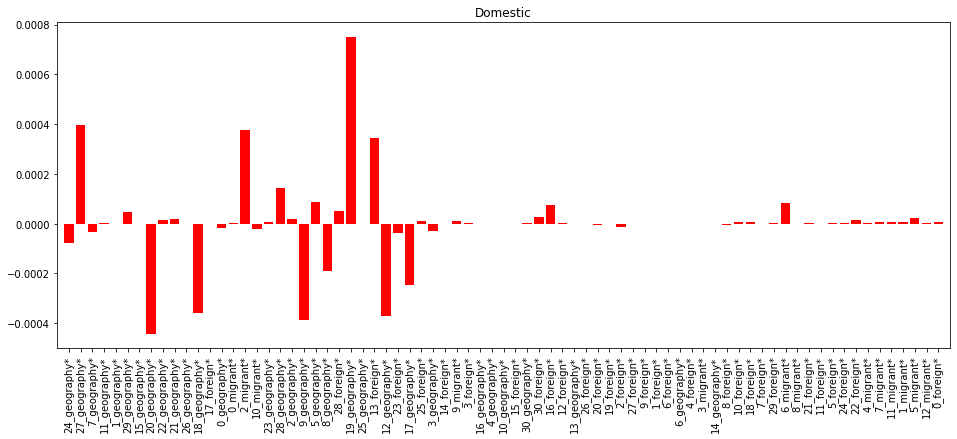

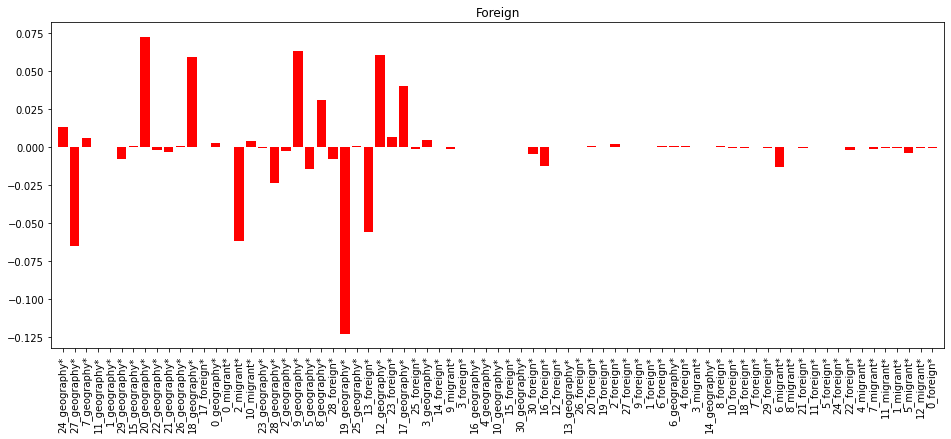

In [ ]:
from sklearn.preprocessing import scale
import json

# Features importances
importances = classifier_balanced_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier_balanced_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
feature_list = [X_interaction.columns[indices[f]] for f in range(X_interaction.shape[1])]  #names of features.
ff = np.array(feature_list)

# Plot the feature importances of the forest
plt.figure()
plt.rcParams['figure.figsize'] = [16, 6]
plt.title("Feature importances")
plt.bar(range(X_interaction.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_interaction.shape[1]), ff[indices], rotation=90)
plt.xlim([-1, X_interaction.shape[1]])
plt.show()

## The new additions to get feature importance to classes: 

# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X_interaction.shape
    X = scale(X_interaction)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

result = class_feature_importance(X, y, importances)
result_top = dict(result_top_0 = {109: 0.000955445954375481, 120: 0.0007590275545907413, 112: 0.0007284471360907369, 108: 0.00047952202331355613, 63: 0.0004003425232439018, 106: 0.00023529630985439157, 105: 0.00011919855132614283, 145: 0.00010428119467955865, 134: 0.00010409391561717533, 107: 8.835230641855868e-05, 104: 6.200765834830338e-05, 119: 3.541719845653274e-05, 103: 3.509911078135814e-05, 110: 3.207094278446428e-05, 118: 2.4780447373026316e-05}, result_top_1 = {139: 0.07150153961331028, 117: 0.06158911439062946, 146: 0.051603100692276575, 75: 0.03282844078005778, 130: 0.030651146728775558, 135: 0.025491416587010447, 121: 0.02519393012801422, 88: 0.01894349581132059, 114: 0.012130287381461527, 64: 0.008254658929398126, 60: 0.0028160880082898714, 113: 0.0018154933835821273, 37: 0.0014089351259136795, 91: 0.0012945364696505055, 30: 0.0012681217694233229})
result_top
print (json.dumps(result_top,indent=4))

# Plot the feature importances of the forest

titles = ["Domestic", "Foreign"]
for t, i in zip(titles, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.title(t)
    plt.bar(range(len(result[i])), result[i].values(),
           color="r", align="center")
    plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.show()

In [ ]:
from operator import itemgetter
result_top_0 = dict(sorted(result[0].items(), key = itemgetter(1), reverse = True)[:15])
result_top_1 = dict(sorted(result[1].items(), key = itemgetter(1), reverse = True)[:15])
print(result_top_1.keys())

dict_keys([139, 117, 146, 75, 130, 135, 121, 88, 114, 64, 60, 113, 37, 91, 30])


## Support Vector Machine Model

In [ ]:
# SVM for imbalanced classification
from sklearn.svm import SVC

# measuring the time to run the model
start_time = time.time()

# Train model 
classifier_balanced_svm = SVC(gamma='scale', class_weight='balanced')
classifier_balanced_svm.fit(X_train, y_train)

# Predict on training set
pred_y_balanced_svm = classifier_balanced_svm.predict(X_test)

# elapsed time to run the model
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the model: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the model: 411.716 seconds


In [ ]:
# SVM Model evaluation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# measuring the time to evaluate  the model
start_time = time.time()

# Is our model still predicting just one class?
print(f"Classes that are being predicted: "
      f"{np.unique(pred_y_balanced_svm)}")
 
# How's our accuracy when a weight is added?
print(f"Accuracy Score: "
      f"{accuracy_score(y_test, pred_y_balanced_svm):.4f}")
 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(classifier_balanced_svm, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

# time elapsed to evaluate the model
elapsed_time = time.time() - start_time

print(f"Elapsed time to evaluate the model: "
      f"{elapsed_time:.3f} seconds")

Classes that are being predicted: [0 1]
Accuracy Score: 0.8818
Mean ROC AUC: 0.858
Elapsed time to evaluate the model: 2.539 seconds


In [ ]:
# View the classification report for test data and predictions

print(classification_report(y_test, pred_y_balanced_svm))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     46721
           1       0.04      0.81      0.08       292

    accuracy                           0.88     47013
   macro avg       0.52      0.85      0.51     47013
weighted avg       0.99      0.88      0.93     47013



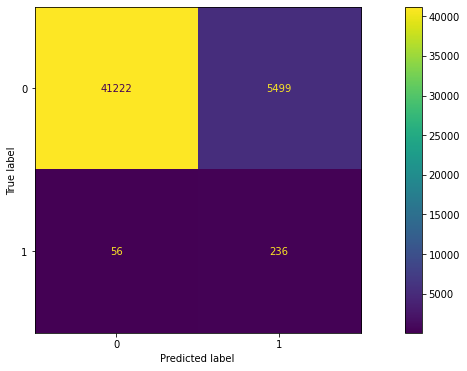

In [ ]:
# View confusion matrix for test data and predictions
from sklearn.metrics import ConfusionMatrixDisplay
_ = ConfusionMatrixDisplay.from_estimator(classifier_balanced_svm, X_test, y_test)